In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None 

In [16]:
#import our CSV file
df = pd.read_csv('2020.csv')

#drop unneccessary columns
df.drop(['Rk', '2PM', '2PP', 'FantPt', 'DKPt', 'FDPt', 
         'VBD', 'PosRank', 'OvRank', 'PPR', 'Fmb', 
         'GS', 'Age', 'Tgt', 'Y/A', 'Att', 'Att.1', 'Cmp', 'Y/R'], axis=1, inplace=True)

#fix name formatting
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])

#rename columns
df.rename({
    'TD': 'PassingTD',
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
}, axis=1, inplace=True)

"""Extra stuff before we parition DataFrames by position"""

#Make sure to put paranthesis if you break lines.
df['FantasyPoints'] = (df['PassingYDs']*0.04 +df['Rec'] + df['PassingTD']*4 - df['Int']*2 + df['RushingYDs']*.1 
                       + df['RushingTD']*6 + df['ReceivingYDs']*.1 + df['ReceivingTD']*6 - df['FL']*2)

df['FantasyPoints/GM'] = df['FantasyPoints']/df['G']

#Unfortnately, our DataFrame in limited. 
df = df[df['Tm'] != '2TM']
df = df[df['Tm'] != '3TM']

rb_df = df[df['FantPos'] == 'RB']
rb_df['Rec/G'] = rb_df['Rec']/rb_df['G']
rb_df = rb_df[rb_df['Rec/G'] > 5]

df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]
rb_df = df[['Tm', 'FantPos', 'FantasyPoints', 'FantasyPoints/GM']]

rb_df = rb_df[rb_df['Tm'] != '2TM']
rb_df = rb_df[rb_df['Tm'] != '3TM']

""" End Extra stuff """

#seperate dataframes based off position
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']

rb_df.head()

,Tm,FantPos,FantasyPoints,FantasyPoints/GM
0,TEN,RB,331.10,20.693750
1,NOR,RB,377.80,25.186667
2,MIN,RB,331.80,23.700000
3,KAN,TE,310.76,20.717333
4,GNB,WR,358.40,25.600000


In [5]:
def get_top_players(df, n):
    return df.groupby('Tm').apply(lambda x: x.nlargest(n, ['FantasyPoints']).min()).reset_index(drop=True)

qb_df = get_top_players(qb_df, 1)
te_df = get_top_players(te_df, 1)
rb1_df = get_top_players(rb_df, 1)
rb2_df = get_top_players(rb_df, 2)
wr1_df = get_top_players(wr_df, 1)
wr2_df = get_top_players(wr_df, 2)
wr3_df = get_top_players(wr_df, 3)

new_names = {
    'QB1': qb_df,
    'TE1': te_df,
    'RB1': rb1_df,
    'RB2': rb2_df,
    'WR1': wr1_df,
    'WR2': wr2_df,
    'WR3': wr3_df
}

for name, new_df in new_names.items():
    new_df.rename({'FantasyPoints/GM': name}, axis=1, inplace=True)
    new_df.drop(['FantPos', 'FantasyPoints'], axis=1, inplace=True)
    new_df.set_index('Tm', inplace=True)
    
df = pd.concat([qb_df, te_df, rb1_df, rb2_df, wr1_df, wr2_df, wr3_df], axis=1)

df.head()

,QB1,TE1,RB1,RB2,WR1,WR2,WR3
Tm,,,,,,,
ARI,23.67125,6.050000,23.67125,17.98750,17.987500,10.457143,7.761538
ATL,17.52750,9.318750,17.52750,17.52750,18.633333,11.316250,11.316250
BAL,22.05200,12.150000,22.05200,11.43750,11.437500,7.246154,4.350000
BUF,24.75375,5.566667,24.75375,20.53750,20.537500,13.833333,8.556250
CAR,15.94800,2.531250,15.94800,13.88125,13.881250,13.881250,13.881250


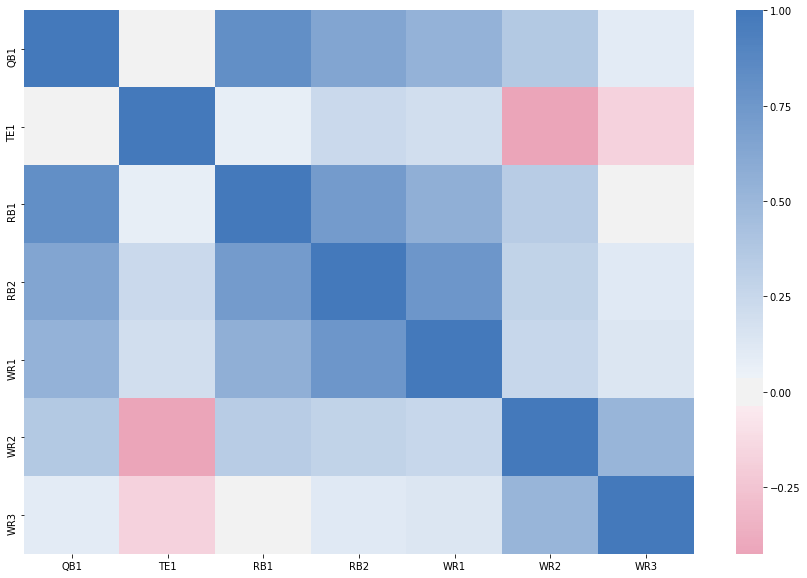

In [6]:
corrMatrix = df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.diverging_palette(0, 250, as_cmap=True)

vizCorrMatrix = sns.heatmap(corrMatrix,cmap=cmap, center=0)

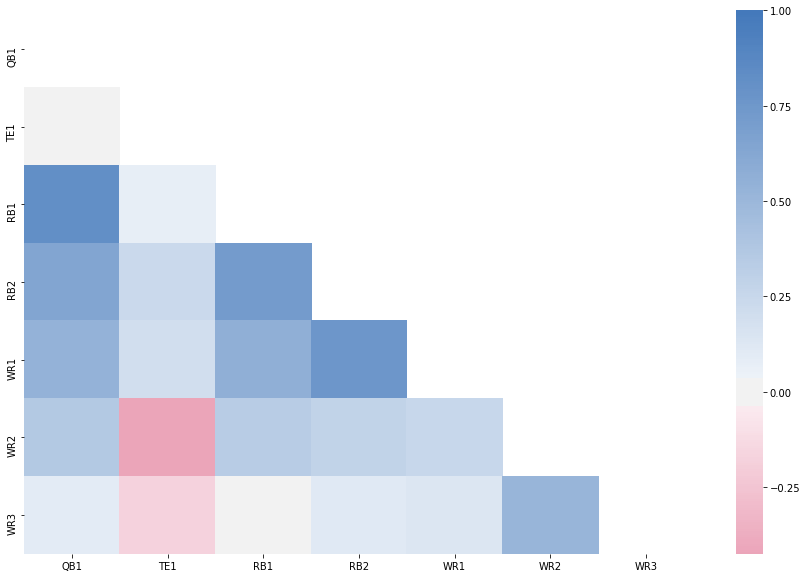

In [7]:
#This is for the Part 3 of Python for Fantasy Football Analysis

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

vizCorrMatrix = sns.heatmap(corrMatrix, mask=mask,cmap=cmap, center=0)